In [130]:
import pandas as pd
import numpy as np

In [131]:
np.random.seed(42)

In [132]:
data = pd.read_csv("./dataset/Final/FinalCancer_Data.csv", sep='\t')
df = pd.DataFrame(data)

In [133]:
data.head()

,PATIENT_ID,OS_MONTHS,OS_STATUS,VITAL_STATUS,INTCLUST,COHORT,AGE_AT_DIAGNOSIS,LATERALITY,NPI,ER_IHC,...,HORMONE_THERAPY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,EFGR,ERBB2,BRCA1,CDH1,PTEN,FOXO3,BRCA2
0,MB-0000,140.500000,LIVING,Living,4ER+,1,75.65,r,6.044,pos,...,YES,YES,IDC,7.996392,9.333972,5.566517,9.676117,10.618447,11.090678,5.438293
1,MB-0002,84.633333,LIVING,Living,4ER+,1,43.19,r,4.020,pos,...,YES,YES,IDC,5.899440,9.729606,5.573536,11.300715,10.177274,9.538686,5.583552
2,MB-0005,163.100000,DECEASED,Died of Disease,3,1,48.87,r,4.030,pos,...,YES,NO,IDC,6.125355,9.725825,6.108762,11.031417,9.765023,9.741934,5.392444
3,MB-0006,164.933333,LIVING,Living,9,1,47.68,r,4.050,pos,...,YES,YES,IDC,5.585357,10.334979,6.333468,11.165504,10.228538,9.761023,5.443577
4,MB-0008,41.366667,DECEASED,Died of Disease,9,1,76.97,r,6.080,pos,...,YES,YES,IDC,5.775809,9.956267,6.562329,10.753308,10.027710,9.565056,5.381974


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PATIENT_ID                 1904 non-null   object 
 1   OS_MONTHS                  1904 non-null   float64
 2   OS_STATUS                  1904 non-null   object 
 3   VITAL_STATUS               1903 non-null   object 
 4   INTCLUST                   1904 non-null   object 
 5   COHORT                     1904 non-null   int64  
 6   AGE_AT_DIAGNOSIS           1904 non-null   float64
 7   LATERALITY                 1798 non-null   object 
 8   NPI                        1904 non-null   float64
 9   ER_IHC                     1874 non-null   object 
 10  INFERRED_MENOPAUSAL_STATE  1904 non-null   object 
 11  BREAST_SURGERY             1882 non-null   object 
 12  CELLULARITY                1850 non-null   object 
 13  HER2_SNP6                  1904 non-null   objec

In [135]:
data.describe()

,OS_MONTHS,COHORT,AGE_AT_DIAGNOSIS,NPI,EFGR,ERBB2,BRCA1,CDH1,PTEN,FOXO3,BRCA2
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,125.025123,2.643908,61.087054,4.033019,6.210828,10.765364,6.083996,9.633391,9.924048,10.526795,5.536174
std,76.334200,1.228615,12.978711,1.144492,0.862967,1.357359,0.369994,1.226868,0.478238,0.612225,0.170631
min,0.000000,1.000000,21.930000,1.000000,5.158794,6.372949,5.179831,5.556714,7.087521,7.004775,5.061352
25%,60.825000,1.000000,51.375000,3.046000,5.692096,9.969681,5.817717,9.070889,9.656970,10.142456,5.416858
50%,114.900000,3.000000,61.770000,4.042000,5.949283,10.530301,6.037961,9.775091,9.976569,10.562893,5.526244
75%,184.475000,3.000000,70.592500,5.040250,6.458780,11.159306,6.288629,10.430348,10.231279,10.940813,5.643470
max,355.200000,5.000000,96.290000,6.360000,14.443632,14.643900,7.768589,13.093380,11.479867,13.087832,6.173802


In [136]:
def printUniqueVal(columnName, dataset):
    if not isinstance(dataset, pd.DataFrame):
        raise TypeError("The dataset must be a pandas DataFrame")   
    if columnName not in dataset.columns:
        raise ValueError(f"Column '{columnName}' does not exist in the dataset")
    # Get the unique values and their counts
    unique_values = [(value, count) for value, count in dataset[columnName].value_counts(dropna=False).items()]
    # Print each unique value with its count
    print(f'{columnName} unique values:' )
    for value, count in unique_values:
        print(f' {value}: {count}')
        
printUniqueVal("OS_STATUS", data)

OS_STATUS unique values:
 DECEASED: 1103
 LIVING: 801


In [137]:
printUniqueVal("VITAL_STATUS", data)

VITAL_STATUS unique values:
 Living: 801
 Died of Disease: 622
 Died of Other Causes: 480
 nan: 1


In [138]:
printUniqueVal('LATERALITY', data)

LATERALITY unique values:
 l: 935
 r: 863
 nan: 106


In [139]:
columns_to_drop = ['PATIENT_ID', 'LATERALITY', 'COHORT']
df = data.drop(columns=columns_to_drop)

In [140]:
df.isna().sum()

OS_MONTHS                      0
OS_STATUS                      0
VITAL_STATUS                   1
INTCLUST                       0
AGE_AT_DIAGNOSIS               0
NPI                            0
ER_IHC                        30
INFERRED_MENOPAUSAL_STATE      0
BREAST_SURGERY                22
CELLULARITY                   54
HER2_SNP6                      0
THREEGENE                    204
CLAUDIN_SUBTYPE                0
CHEMOTHERAPY                   0
HORMONE_THERAPY                0
RADIO_THERAPY                  0
HISTOLOGICAL_SUBTYPE           2
EFGR                           0
ERBB2                          0
BRCA1                          0
CDH1                           0
PTEN                           0
FOXO3                          0
BRCA2                          0
dtype: int64

In [141]:
printUniqueVal('THREEGENE', df)

THREEGENE unique values:
 ER+/HER2- Low Prolif: 619
 ER+/HER2- High Prolif: 603
 ER-/HER2-: 290
 nan: 204
 HER2+: 188


In [142]:
# df['THREEGENE'].fillna('Unknown', inplace=True)
# Filling missing values with the mode of the column
df['THREEGENE'].fillna(df['THREEGENE'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\419601893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['THREEGENE'].fillna(df['THREEGENE'].mode()[0], inplace=True)


In [143]:
printUniqueVal('THREEGENE', df)

THREEGENE unique values:
 ER+/HER2- Low Prolif: 823
 ER+/HER2- High Prolif: 603
 ER-/HER2-: 290
 HER2+: 188


In [144]:
printUniqueVal('THREEGENE', df)

THREEGENE unique values:
 ER+/HER2- Low Prolif: 823
 ER+/HER2- High Prolif: 603
 ER-/HER2-: 290
 HER2+: 188


In [145]:
printUniqueVal('CELLULARITY', df)

CELLULARITY unique values:
 high: 939
 moderate: 711
 low: 200
 nan: 54


In [146]:
df['CELLULARITY'].fillna(df['CELLULARITY'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\3875379682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CELLULARITY'].fillna(df['CELLULARITY'].mode()[0], inplace=True)


In [147]:
printUniqueVal('CELLULARITY', df)

CELLULARITY unique values:
 high: 993
 moderate: 711
 low: 200


In [148]:
printUniqueVal('ER_IHC', df)

ER_IHC unique values:
 pos: 1445
 neg: 429
 nan: 30


In [149]:
non_null_values = df['ER_IHC'].dropna().values
df['ER_IHC'] = df['ER_IHC'].apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)

In [150]:
printUniqueVal('ER_IHC', df)

ER_IHC unique values:
 pos: 1466
 neg: 438


In [151]:
printUniqueVal('BREAST_SURGERY', df)

BREAST_SURGERY unique values:
 MASTECTOMY: 1127
 BREAST CONSERVING: 755
 nan: 22


In [152]:
non_null_values = df['BREAST_SURGERY'].dropna().values

# Randomly fill NaNs based on existing proportions
df['BREAST_SURGERY'] = df['BREAST_SURGERY'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x
)

In [153]:
printUniqueVal('BREAST_SURGERY', df)


BREAST_SURGERY unique values:
 MASTECTOMY: 1138
 BREAST CONSERVING: 766


In [154]:
printUniqueVal("HISTOLOGICAL_SUBTYPE", df)

HISTOLOGICAL_SUBTYPE unique values:
 IDC: 1500
 ILC: 141
 IDC+ILC: 87
 IDC-TUB: 67
 IDC-MUC: 42
 IDC-MED: 31
 OTHER: 10
 OTHER INVASIVE: 9
 INVASIVE TUMOUR: 9
 MIXED NST AND A SPECIAL TYPE: 3
 DCIS: 2
 nan: 2
 BENIGN: 1


In [155]:
non_null_values = df['HISTOLOGICAL_SUBTYPE'].dropna().values
proportions = df['HISTOLOGICAL_SUBTYPE'].value_counts(normalize=True)

# Randomly impute missing values based on existing proportions
df['HISTOLOGICAL_SUBTYPE'] = df['HISTOLOGICAL_SUBTYPE'].apply(
    lambda x: np.random.choice(proportions.index, p=proportions.values) if pd.isnull(x) else x
)

In [156]:
printUniqueVal("HISTOLOGICAL_SUBTYPE", df)


HISTOLOGICAL_SUBTYPE unique values:
 IDC: 1501
 ILC: 141
 IDC+ILC: 87
 IDC-TUB: 67
 IDC-MUC: 42
 IDC-MED: 31
 OTHER: 11
 OTHER INVASIVE: 9
 INVASIVE TUMOUR: 9
 MIXED NST AND A SPECIAL TYPE: 3
 DCIS: 2
 BENIGN: 1


In [157]:
printUniqueVal("VITAL_STATUS", df)

VITAL_STATUS unique values:
 Living: 801
 Died of Disease: 622
 Died of Other Causes: 480
 nan: 1


In [158]:
df['VITAL_STATUS'].fillna(df['VITAL_STATUS'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\1376566140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VITAL_STATUS'].fillna(df['VITAL_STATUS'].mode()[0], inplace=True)


In [159]:
data2 = pd.read_excel("./dataset/Final/cancer patient data sets.xlsx")
data2.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [160]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [161]:
data2.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [162]:
printUniqueVal("Age", data2)  

Age unique values:
 35: 77
 33: 69
 38: 69
 37: 51
 44: 51
 27: 48
 45: 42
 48: 40
 26: 37
 28: 32
 52: 31
 32: 31
 24: 30
 25: 30
 62: 30
 46: 23
 39: 21
 36: 21
 47: 20
 42: 20
 19: 20
 17: 20
 53: 19
 22: 19
 23: 19
 29: 19
 18: 18
 55: 11
 73: 10
 34: 10
 65: 10
 64: 10
 61: 10
 49: 10
 14: 9
 31: 9
 43: 1
 51: 1
 54: 1
 63: 1


In [163]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [164]:
data2.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [165]:
printUniqueVal("OccuPational Hazards", data2)

OccuPational Hazards unique values:
 7: 365
 3: 151
 2: 132
 5: 130
 4: 112
 1: 50
 6: 30
 8: 30


In [166]:
conversion_dic_data2 = {
    'Patient Id': 'string',
    'Age': 'int8',
    'Gender': 'category',
    'Air Pollution': 'int8',
    'Alcohol use': 'int8',
    'Dust Allergy': 'int8',
    'OccuPational Hazards': 'int8',
    'Genetic Risk': 'int8',
    'chronic Lung Disease': 'int8',
    'Balanced Diet': 'int8',
    'Obesity': 'int8',
    'Smoking': 'int8',
    'Passive Smoker': 'int8',
    'Chest Pain': 'int8',
    'Coughing of Blood': 'int8',
    'Fatigue': 'int8',
    'Weight Loss': 'int8',
    'Shortness of Breath': 'int8',
    'Wheezing': 'int8',
    'Swallowing Difficulty': 'int8',
    'Clubbing of Finger Nails': 'int8',
    'Frequent Cold': 'int8',
    'Dry Cough': 'int8',
    'Snoring': 'int8',
    'Level': 'category',
}

In [167]:
data2 = data2.astype(conversion_dic_data2)

In [168]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Patient Id                1000 non-null   string  
 1   Age                       1000 non-null   int8    
 2   Gender                    1000 non-null   category
 3   Air Pollution             1000 non-null   int8    
 4   Alcohol use               1000 non-null   int8    
 5   Dust Allergy              1000 non-null   int8    
 6   OccuPational Hazards      1000 non-null   int8    
 7   Genetic Risk              1000 non-null   int8    
 8   chronic Lung Disease      1000 non-null   int8    
 9   Balanced Diet             1000 non-null   int8    
 10  Obesity                   1000 non-null   int8    
 11  Smoking                   1000 non-null   int8    
 12  Passive Smoker            1000 non-null   int8    
 13  Chest Pain                1000 non-null   int8   

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OS_MONTHS                  1904 non-null   float64
 1   OS_STATUS                  1904 non-null   object 
 2   VITAL_STATUS               1904 non-null   object 
 3   INTCLUST                   1904 non-null   object 
 4   AGE_AT_DIAGNOSIS           1904 non-null   float64
 5   NPI                        1904 non-null   float64
 6   ER_IHC                     1904 non-null   object 
 7   INFERRED_MENOPAUSAL_STATE  1904 non-null   object 
 8   BREAST_SURGERY             1904 non-null   object 
 9   CELLULARITY                1904 non-null   object 
 10  HER2_SNP6                  1904 non-null   object 
 11  THREEGENE                  1904 non-null   object 
 12  CLAUDIN_SUBTYPE            1904 non-null   object 
 13  CHEMOTHERAPY               1904 non-null   objec

In [170]:
conversion_dic_data2 = {
    'OS_MONTHS': 'string',
    'OS_STATUS': 'int8',
    'VITAL_STATUS': 'category',
    'INTCLUST': 'int8',
    'AGE_AT_DIAGNOSIS': 'int8',
    'NPI': 'int8',
    'ER_IHC': 'int8',
    'INFERRED_MENOPAUSAL_STATE': 'int8',
    'BREAST_SURGERY': 'int8',
    'CELLULARITY': 'int8',
    'HER2_SNP6': 'int8',
    'THREEGENE': 'int8',
    'CLAUDIN_SUBTYPE': 'int8',
    'CHEMOTHERAPY': 'int8',
    'HORMONE_THERAPY': 'int8',
    'RADIO_THERAPY': 'int8',
    'HISTOLOGICAL_SUBTYPE': 'int8',
    'EFGR': 'int8',
    'ERBB2': 'int8',
    'BRCA1': 'int8',
    'CDH1': 'int8',
    'PTEN': 'int8',
    'FOXO3': 'int8',
    'BRCA2': 'int8',
}

In [171]:
test = pd.read_csv("./dataset/new-data/kaggle_to_students.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         217 non-null    object 
 1   age             217 non-null    int64  
 2   eventdeath      217 non-null    int64  
 3   timerecurrence  217 non-null    float64
 4   chemo           217 non-null    int64  
 5   hormonal        217 non-null    int64  
 6   amputation      217 non-null    int64  
 7   histtype        217 non-null    int64  
 8   diam            217 non-null    int64  
 9   posnodes        217 non-null    int64  
 10  grade           217 non-null    int64  
 11  angioinv        217 non-null    int64  
 12  lymphinfil      217 non-null    int64  
 13  esr1            217 non-null    float64
dtypes: float64(2), int64(11), object(1)
memory usage: 23.9+ KB


In [172]:
test2 = pd.read_csv("./dataset/new-data/kaggle_prediction_features.csv")
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         55 non-null     object 
 1   age             55 non-null     int64  
 2   timerecurrence  55 non-null     float64
 3   chemo           55 non-null     int64  
 4   hormonal        55 non-null     int64  
 5   amputation      55 non-null     int64  
 6   histtype        55 non-null     int64  
 7   diam            55 non-null     int64  
 8   posnodes        55 non-null     int64  
 9   grade           55 non-null     int64  
 10  angioinv        55 non-null     int64  
 11  lymphinfil      55 non-null     int64  
 12  esr1            55 non-null     float64
dtypes: float64(2), int64(10), object(1)
memory usage: 5.7+ KB


In [173]:
datatest = pd.read_excel("./dataset/Final/Query_5_years.xlsx")

# EDA

In [174]:
datatest.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Age at diagnosis                                      35349 non-null  int64 
 1   Regional nodes positive (1988+)                       35349 non-null  int64 
 2   Total number of in situ/malignant tumors for patient  35349 non-null  int64 
 3   Radiation recode                                      35349 non-null  object
 4   Chemotherapy recode                                   35349 non-null  object
 5   Radiation sequence with surgery                       35349 non-null  object
 6   ER Status Recode Breast Cancer (1990+)                35349 non-null  object
 7   PR Status Recode Breast Cancer (1990+)                35349 non-null  object
 8   CS tumor size (2004-2015)                             35349 non-nu

In [175]:
datatest.head()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,54,3,1,Beam radiation,Yes,Radiation after surgery,Negative,Negative,25,Positive,14,Alive,White,Female,Alive,2011,2016,5,Alive
1,59,3,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,36,Negative,19,Alive,White,Female,Alive,2011,2016,5,Alive
2,54,0,2,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,6,Negative,5,Alive,White,Female,Alive,2010,2016,6,Alive
3,58,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,1,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
4,89,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Positive,17,Negative,1,Alive,White,Female,Alive,2011,2016,5,Alive


In [176]:
printUniqueVal("COD to site recode", datatest)

COD to site recode unique values:
 Alive: 23076
 Breast: 7350
 Diseases of Heart: 1269
 Other Cause of Death: 973
 Chronic Obstructive Pulmonary Disease and Allied Cond: 298
 Cerebrovascular Diseases: 280
 Lung and Bronchus: 254
 Miscellaneous Malignant Cancer: 250
 Alzheimers (ICD-9 and 10 only): 195
 Accidents and Adverse Effects: 170
 State DC not available or state DC available but no COD: 147
 Diabetes Mellitus: 145
 Pneumonia and Influenza: 112
 Septicemia: 105
 Pancreas: 76
 Hypertension without Heart Disease: 72
 Other Infectious and Parasitic Diseases including HIV: 67
 Chronic Liver Disease and Cirrhosis: 58
 Ovary: 47
 Colon excluding Rectum: 43
 Brain and Other Nervous System: 37
 Acute Myeloid Leukemia: 35
 Aortic Aneurysm and Dissection: 32
 Suicide and Self-Inflicted Injury: 29
 Liver: 28
 Stomach: 17
 Soft Tissue including Heart: 14
 Atherosclerosis: 13
 Intrahepatic Bile Duct: 13
 Non-Hodgkin Lymphoma: 13
 Esophagus: 12
 Rectum and Rectosigmoid Junction: 11
 Myeloma: 1

In [177]:
printUniqueVal("Vital status recode (study cutoff used)", datatest)

Vital status recode (study cutoff used) unique values:
 Alive: 23076
 Dead: 12273


In [178]:
datatest.isna().sum()

Age at diagnosis                                        0
Regional nodes positive (1988+)                         0
Total number of in situ/malignant tumors for patient    0
Radiation recode                                        0
Chemotherapy recode                                     0
Radiation sequence with surgery                         0
ER Status Recode Breast Cancer (1990+)                  0
PR Status Recode Breast Cancer (1990+)                  0
CS tumor size (2004-2015)                               0
Derived HER2 Recode (2010+)                             0
Regional nodes examined (1988+)                         0
COD to site recode                                      0
Race recode                                             0
Sex                                                     0
Vital status recode (study cutoff used)                 0
Diagnosis_year                                          0
Last_fu _year                                           0
interva_years 

In [179]:
numerical_columns = ['Age at diagnosis', 'Regional nodes positive (1988+)', 
                     'Total number of in situ/malignant tumors for patient', 
                     'Regional nodes examined (1988+)', 'Diagnosis_year', 
                     'Last_fu _year', 'interva_years']

# Convert to smallest integer type that fits the data
for col in numerical_columns:
    datatest[col] = pd.to_numeric(datatest[col], downcast='integer')

# Convert categorical columns to 'category' data type
categorical_columns = ['Radiation recode', 'Chemotherapy recode', 
                       'Radiation sequence with surgery', 'ER Status Recode Breast Cancer (1990+)', 
                       'PR Status Recode Breast Cancer (1990+)', 'CS tumor size (2004-2015)', 
                       'Derived HER2 Recode (2010+)', 'COD to site recode', 
                       'Race recode', 'Sex', 'Vital status recode (study cutoff used)', 
                       'stutus_5_years']

for col in categorical_columns:
    datatest[col] = datatest[col].astype('category')

In [180]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Age at diagnosis                                      35349 non-null  int8    
 1   Regional nodes positive (1988+)                       35349 non-null  int8    
 2   Total number of in situ/malignant tumors for patient  35349 non-null  int8    
 3   Radiation recode                                      35349 non-null  category
 4   Chemotherapy recode                                   35349 non-null  category
 5   Radiation sequence with surgery                       35349 non-null  category
 6   ER Status Recode Breast Cancer (1990+)                35349 non-null  category
 7   PR Status Recode Breast Cancer (1990+)                35349 non-null  category
 8   CS tumor size (2004-2015)                     

In [181]:
printUniqueVal("stutus_5_years", datatest)

stutus_5_years unique values:
 Alive: 23404
 Dead: 11945


In [182]:
datatest.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at diagnosis,35349.0,62.568220,14.532631,2.0,52.0,62.0,73.0,99.0
Regional nodes positive (1988+),35349.0,22.018303,39.668225,0.0,0.0,0.0,8.0,99.0
Total number of in situ/malignant tumors for patient,35349.0,1.117316,0.346522,1.0,1.0,1.0,1.0,4.0
Regional nodes examined (1988+),35349.0,9.580639,20.312689,0.0,1.0,3.0,9.0,99.0
Diagnosis_year,35349.0,2011.024668,1.278456,2010.0,2010.0,2011.0,2011.0,2016.0
Last_fu _year,35349.0,2015.309825,1.366321,2010.0,2015.0,2016.0,2016.0,2016.0
interva_years,35349.0,4.285157,1.933265,0.0,3.0,5.0,6.0,6.0


In [183]:
''' 
1. a verifier les valeur aberante sur [Regional nodes positive (1988+)]
2. change datatypes of each date column
3. check min value in [interva_years]
'''

' \n1. a verifier les valeur aberante sur [Regional nodes positive (1988+)]\n2. change datatypes of each date column\n3. check min value in [interva_years]\n'

In [184]:
datatest.select_dtypes(include= "category").describe().T

,count,unique,top,freq
Radiation recode,35349,6,Beam radiation,17468
Chemotherapy recode,35349,2,No/Unknown,21118
Radiation sequence with surgery,35349,7,Radiation after surgery,17625
ER Status Recode Breast Cancer (1990+),35349,4,Positive,27246
PR Status Recode Breast Cancer (1990+),35349,4,Positive,23244
CS tumor size (2004-2015),35349,193,999,1988
Derived HER2 Recode (2010+),35349,4,Negative,27419
COD to site recode,35349,61,Alive,23076
Race recode,35349,3,White,30632
Sex,35349,2,Female,35037


In [185]:
printUniqueVal("CS tumor size (2004-2015)", datatest)

CS tumor size (2004-2015) unique values:
 999: 1988
 15: 1842
 12: 1378
 25: 1311
 10: 1305
 20: 1197
 8: 1075
 30: 1062
 9: 1031
 18: 1023
 11: 1004
 13: 916
 7: 864
 6: 846
 16: 802
 17: 802
 14: 799
 22: 779
 40: 735
 5: 678
 35: 677
 21: 614
 19: 537
 24: 536
 23: 516
 50: 493
 4: 487
 28: 450
 45: 417
 27: 415
 60: 412
 3: 409
 2: 388
 26: 364
 Blank(s): 364
 32: 351
 70: 311
 990: 309
 80: 259
 55: 254
 1: 243
 29: 209
 38: 200
 33: 196
 100: 194
 31: 185
 37: 179
 36: 176
 65: 176
 34: 168
 998: 167
 42: 162
 90: 153
 0: 124
 51: 119
 52: 117
 48: 116
 43: 116
 44: 98
 39: 98
 75: 96
 47: 94
 46: 90
 41: 88
 120: 81
 49: 63
 110: 63
 53: 63
 995: 61
 56: 58
 58: 54
 991: 54
 54: 53
 85: 48
 57: 48
 150: 46
 992: 42
 63: 41
 62: 41
 130: 39
 140: 38
 59: 38
 993: 34
 95: 33
 61: 32
 64: 31
 66: 27
 68: 26
 72: 26
 78: 24
 84: 24
 76: 22
 73: 21
 86: 20
 77: 20
 105: 19
 83: 19
 69: 19
 994: 17
 82: 17
 67: 17
 74: 13
 115: 13
 87: 12
 98: 12
 170: 12
 200: 12
 88: 11
 71: 11
 94:

In [186]:
datatest['CS tumor size (2004-2015)'] = pd.to_numeric(datatest['CS tumor size (2004-2015)'], errors='coerce')

In [187]:
datatest.select_dtypes(include= "category").describe().T

,count,unique,top,freq
Radiation recode,35349,6,Beam radiation,17468
Chemotherapy recode,35349,2,No/Unknown,21118
Radiation sequence with surgery,35349,7,Radiation after surgery,17625
ER Status Recode Breast Cancer (1990+),35349,4,Positive,27246
PR Status Recode Breast Cancer (1990+),35349,4,Positive,23244
Derived HER2 Recode (2010+),35349,4,Negative,27419
COD to site recode,35349,61,Alive,23076
Race recode,35349,3,White,30632
Sex,35349,2,Female,35037
Vital status recode (study cutoff used),35349,2,Alive,23076


In [188]:
printUniqueVal("COD to site recode", datatest)

COD to site recode unique values:
 Alive: 23076
 Breast: 7350
 Diseases of Heart: 1269
 Other Cause of Death: 973
 Chronic Obstructive Pulmonary Disease and Allied Cond: 298
 Cerebrovascular Diseases: 280
 Lung and Bronchus: 254
 Miscellaneous Malignant Cancer: 250
 Alzheimers (ICD-9 and 10 only): 195
 Accidents and Adverse Effects: 170
 State DC not available or state DC available but no COD: 147
 Diabetes Mellitus: 145
 Pneumonia and Influenza: 112
 Septicemia: 105
 Pancreas: 76
 Hypertension without Heart Disease: 72
 Other Infectious and Parasitic Diseases including HIV: 67
 Chronic Liver Disease and Cirrhosis: 58
 Ovary: 47
 Colon excluding Rectum: 43
 Brain and Other Nervous System: 37
 Acute Myeloid Leukemia: 35
 Aortic Aneurysm and Dissection: 32
 Suicide and Self-Inflicted Injury: 29
 Liver: 28
 Stomach: 17
 Soft Tissue including Heart: 14
 Intrahepatic Bile Duct: 13
 Atherosclerosis: 13
 Non-Hodgkin Lymphoma: 13
 Esophagus: 12
 Rectum and Rectosigmoid Junction: 11
 Myeloma: 1

In [189]:
printUniqueVal("Radiation sequence with surgery", datatest)

Radiation sequence with surgery unique values:
 Radiation after surgery: 17625
 No radiation and/or cancer-directed surgery: 17500
 Radiation prior to surgery: 123
 Intraoperative radiation: 45
 Radiation before and after surgery: 33
 Intraoperative rad with other rad before/after surgery: 20
 Surgery both before and after radiation: 3


In [190]:
var_cat = datatest.select_dtypes(include = "category").columns
var_cat

Index(['Radiation recode', 'Chemotherapy recode',
       'Radiation sequence with surgery',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
       'COD to site recode', 'Race recode', 'Sex',
       'Vital status recode (study cutoff used)', 'stutus_5_years'],
      dtype='object')

In [191]:
var_num = datatest.select_dtypes(exclude="category").columns
var_num

Index(['Age at diagnosis', 'Regional nodes positive (1988+)',
       'Total number of in situ/malignant tumors for patient',
       'CS tumor size (2004-2015)', 'Regional nodes examined (1988+)',
       'Diagnosis_year', 'Last_fu _year', 'interva_years'],
      dtype='object')

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Age at diagnosis                                      35349 non-null  int8    
 1   Regional nodes positive (1988+)                       35349 non-null  int8    
 2   Total number of in situ/malignant tumors for patient  35349 non-null  int8    
 3   Radiation recode                                      35349 non-null  category
 4   Chemotherapy recode                                   35349 non-null  category
 5   Radiation sequence with surgery                       35349 non-null  category
 6   ER Status Recode Breast Cancer (1990+)                35349 non-null  category
 7   PR Status Recode Breast Cancer (1990+)                35349 non-null  category
 8   CS tumor size (2004-2015)                     

In [194]:
datatest['Diagnosis_year'] = datatest['Diagnosis_year'].astype('category')
datatest['Last_fu _year'] = datatest['Last_fu _year'].astype('category')

In [195]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Age at diagnosis                                      35349 non-null  int8    
 1   Regional nodes positive (1988+)                       35349 non-null  int8    
 2   Total number of in situ/malignant tumors for patient  35349 non-null  int8    
 3   Radiation recode                                      35349 non-null  category
 4   Chemotherapy recode                                   35349 non-null  category
 5   Radiation sequence with surgery                       35349 non-null  category
 6   ER Status Recode Breast Cancer (1990+)                35349 non-null  category
 7   PR Status Recode Breast Cancer (1990+)                35349 non-null  category
 8   CS tumor size (2004-2015)                     

<Axes: ylabel='count'>

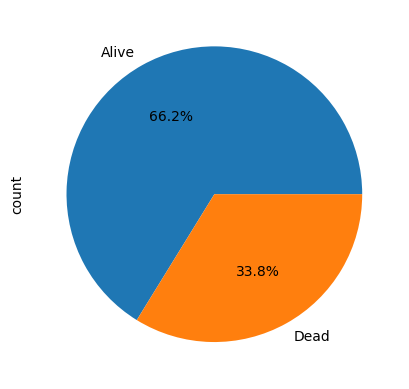

In [196]:
datatest['stutus_5_years'].value_counts().plot(kind='pie', autopct="%1.1f%%")


In [197]:
var_cat = datatest.select_dtypes(include = "category").columns.tolist()
var_cat1 = var_cat.remove('COD to site recode')
var_cat1

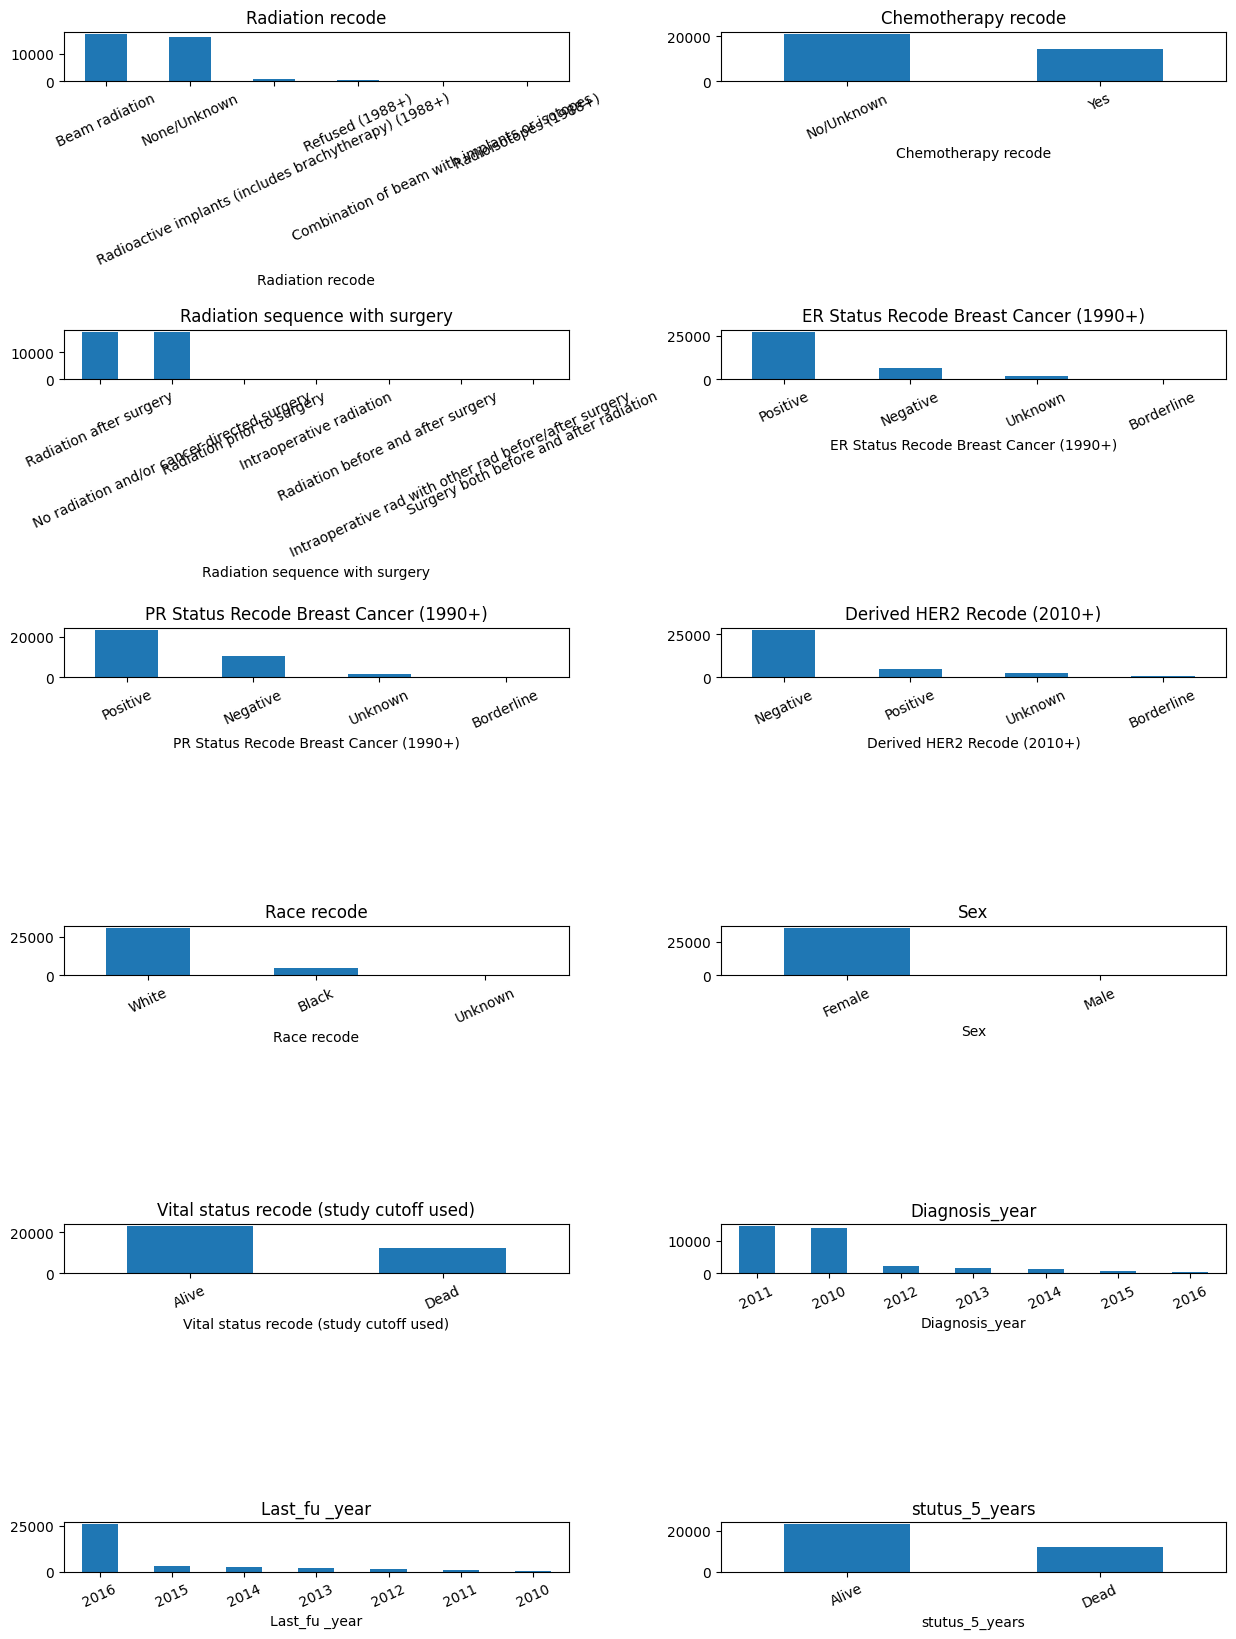

In [198]:
# Créer une figure avec des subplots de 2 colonnes et 5 lignes
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle pour afficher chaque variable catégorielle dans un subplot
for i, var in enumerate(var_cat):
    datatest[var].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(var)
    # Rotation des labels X à 45 degrés
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(25)
    axes[i].tick_params(axis='x', labelsize=10) 
plt.subplots_adjust(hspace=5, wspace=0.3)
# Ajuster la disposition pour éviter les chevauchements
# plt.tight_layout()
plt.show()

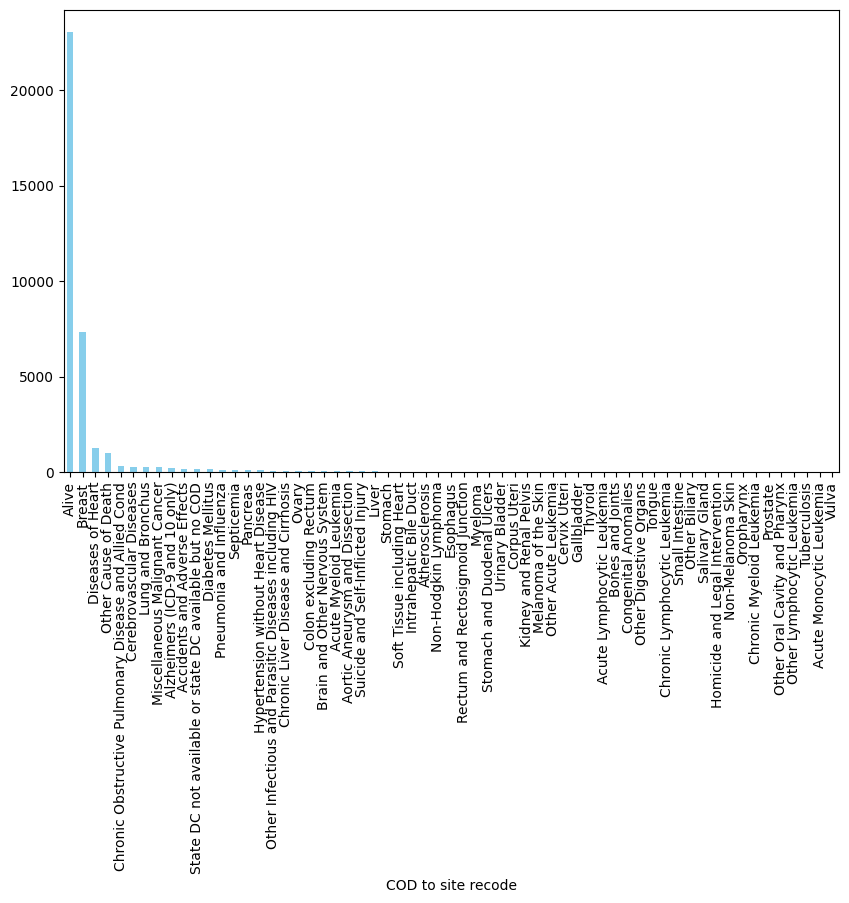

In [199]:
cod_count = datatest['COD to site recode'].value_counts()
plt.figure(figsize =(10, 6))
cod_count.plot(kind = 'bar', color='skyblue')

# Rotate x-axis labels if necessary
# plt.xticks(rotation=45)

# Show the plot
plt.show()

In [200]:
var_num = var_num.tolist()
var_num

['Age at diagnosis',
 'Regional nodes positive (1988+)',
 'Total number of in situ/malignant tumors for patient',
 'CS tumor size (2004-2015)',
 'Regional nodes examined (1988+)',
 'Diagnosis_year',
 'Last_fu _year',
 'interva_years']

In [201]:
non_num_val = ['Diagnosis_year', 'Last_fu _year']
for val in non_num_val:
    var_num.remove(val)
var_num

['Age at diagnosis',
 'Regional nodes positive (1988+)',
 'Total number of in situ/malignant tumors for patient',
 'CS tumor size (2004-2015)',
 'Regional nodes examined (1988+)',
 'interva_years']

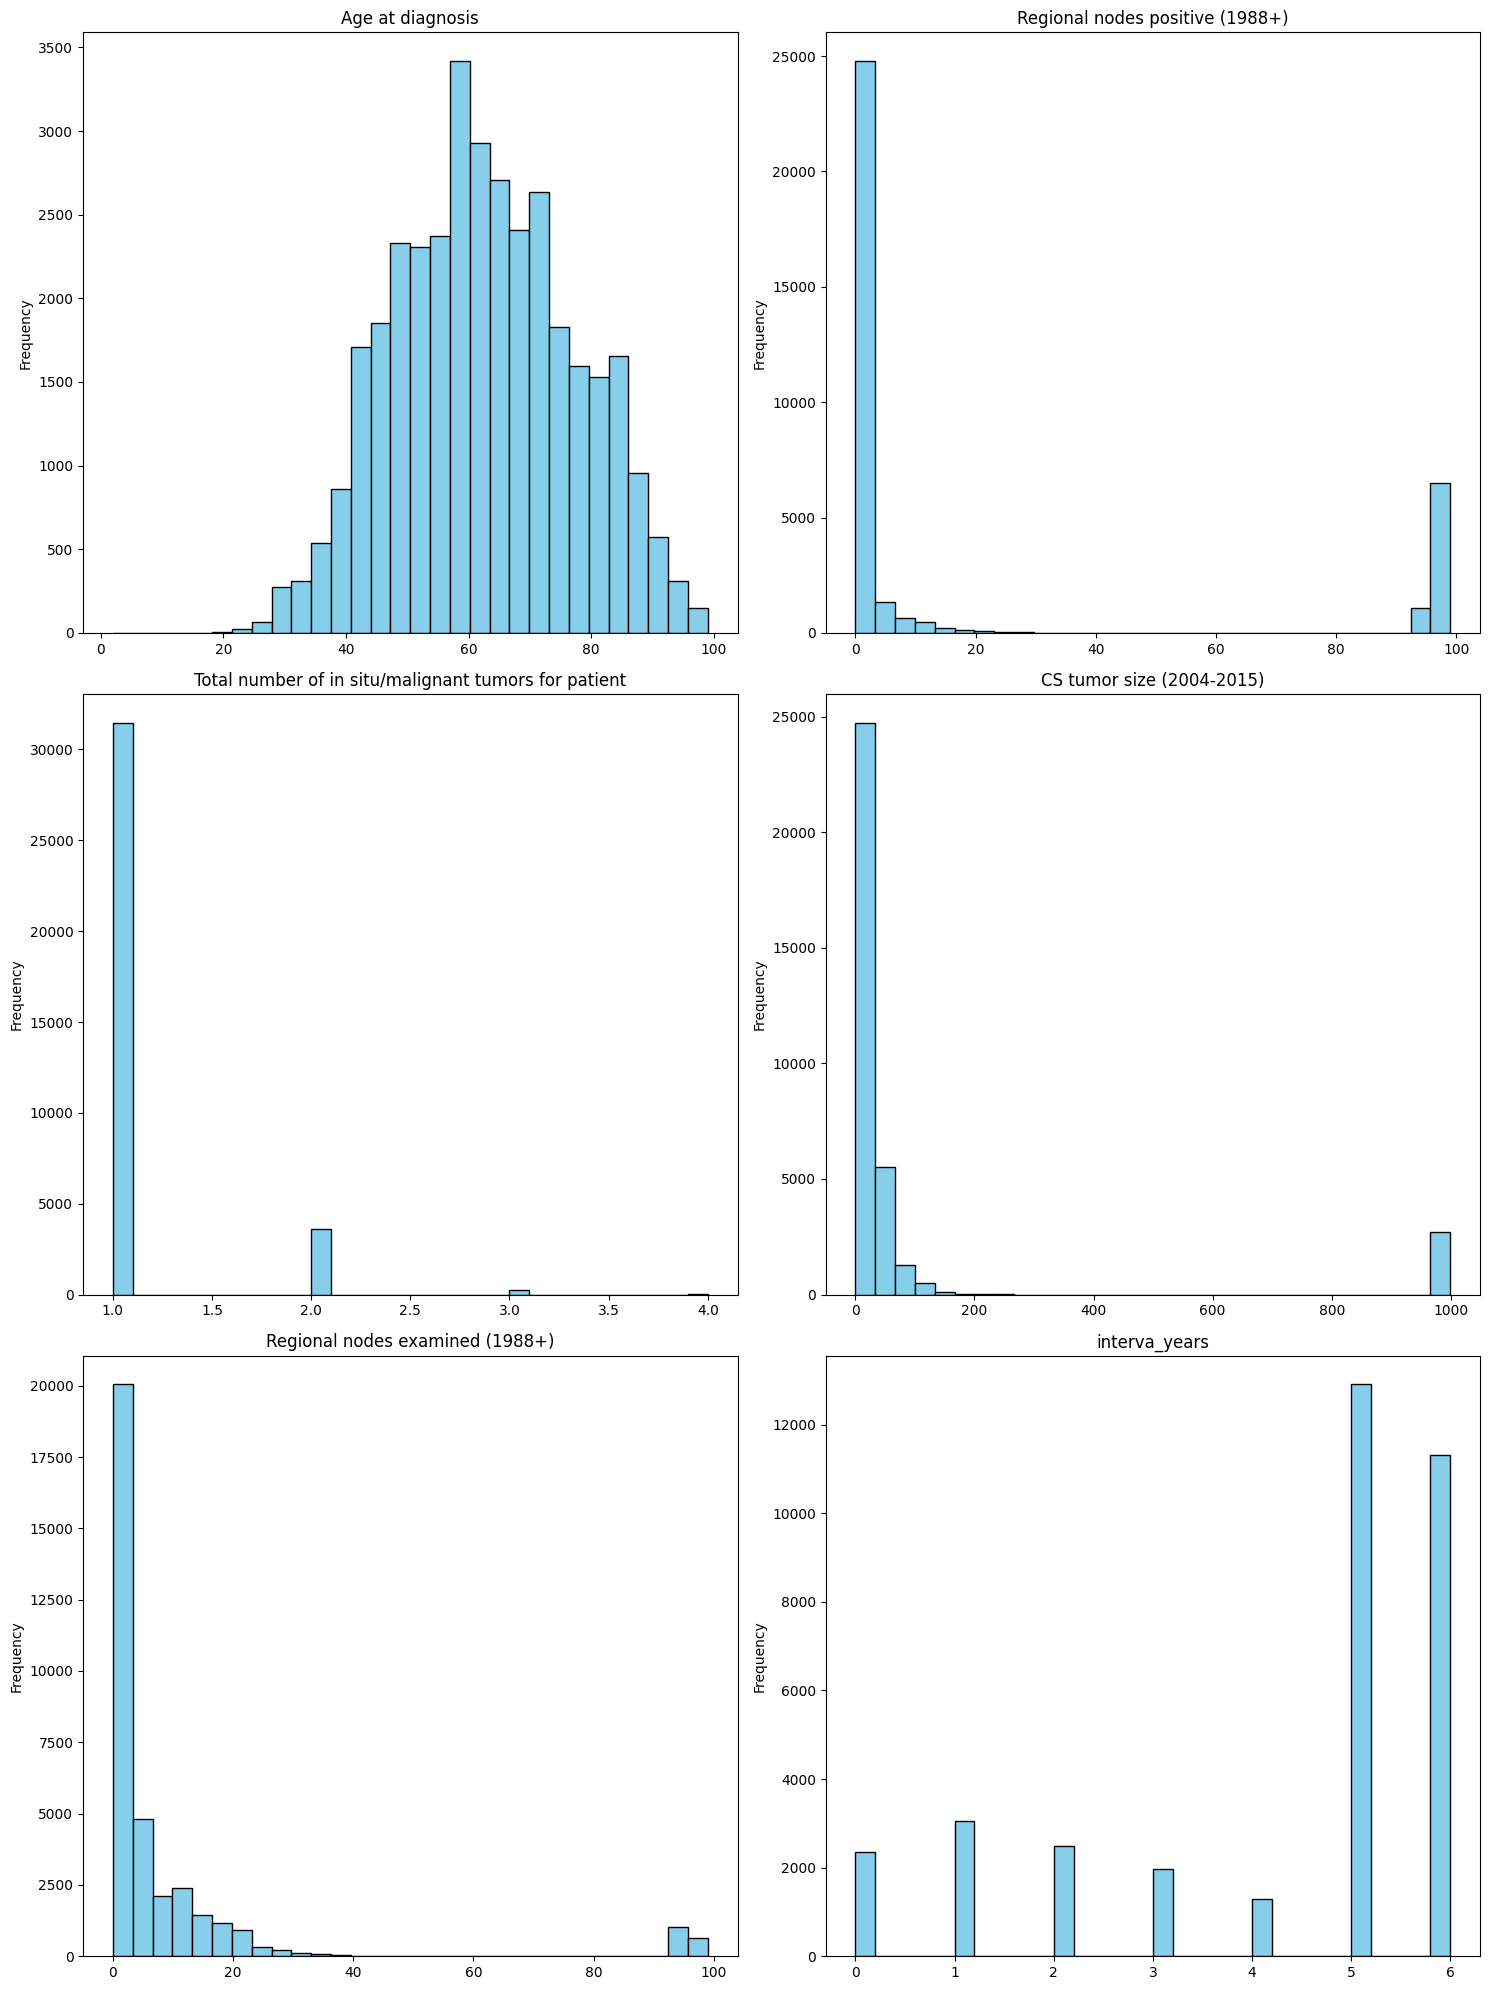

In [202]:
# Visualiser les variables numériques avec des histogrammes
fig, axes = plt.subplots(3, 2, figsize=(15, 20))  # Ajuster le nombre de lignes et colonnes
axes = axes.flatten()

for i, var in enumerate(var_num):
    datatest[var].plot(kind='hist', bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

In [203]:
datatest['y'] = datatest['stutus_5_years'].map({'Alive':0, 'Dead': 1})

In [204]:
datatest['y'] = datatest['y'].astype('int8')

var_num = datatest.select_dtypes(exclude="category").columns
var_num.tolist()

['Age at diagnosis',
 'Regional nodes positive (1988+)',
 'Total number of in situ/malignant tumors for patient',
 'CS tumor size (2004-2015)',
 'Regional nodes examined (1988+)',
 'interva_years',
 'y']

<Axes: >

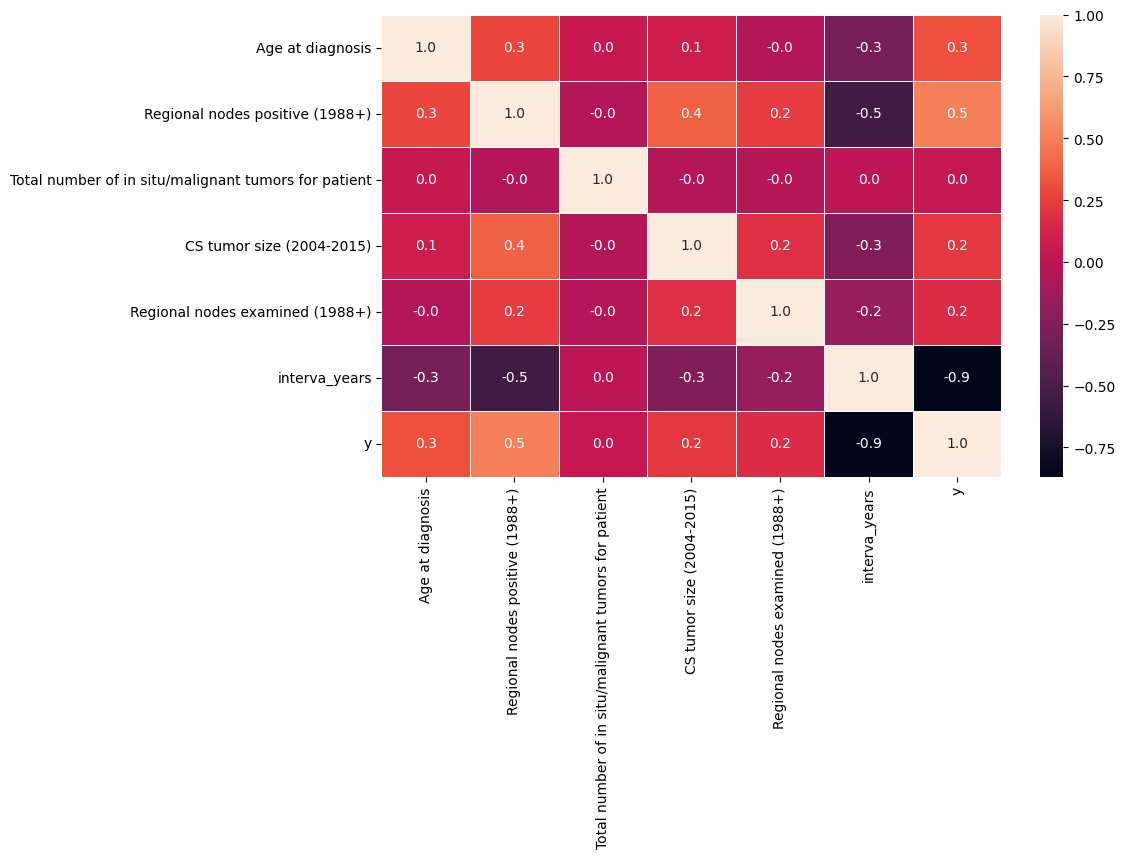

In [205]:
plt.figure(figsize = (10 ,6))
sns.heatmap(datatest[var_num].corr(), annot=True, fmt=".1f", linewidths=.5)

In [206]:
datatest['interva_years']

0        5
1        5
2        6
3        6
4        5
        ..
35344    0
35345    2
35346    6
35347    3
35348    2
Name: interva_years, Length: 35349, dtype: int8

<Axes: ylabel='interva_years'>

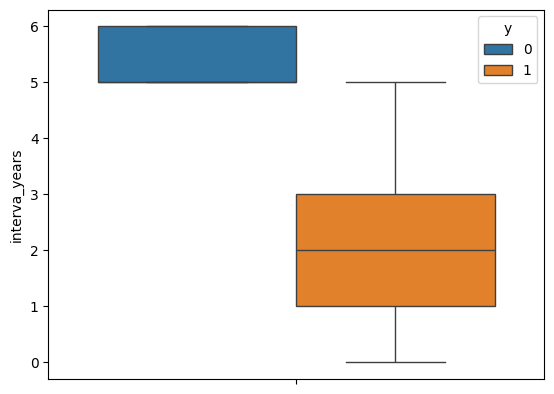

In [216]:
# plt.bar(x=datatest['interva_years'], y = datatest['y'])
sns.boxplot(data = datatest, y = 'interva_years', hue="y")

In [221]:
len(var_cat)

12

C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\2736354346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (datatest.groupby([var, 'y'])['y'].count()/datatest.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True, ax=ax, color=[palette[0], palette[1]])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\2736354346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (datatest.groupby([var, 'y'])['y'].count()/datatest.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True, ax=ax, color=[palette[0], palette[1]])
C:\Users\Dell\AppData\Local\Temp\ipykernel_13752\27363

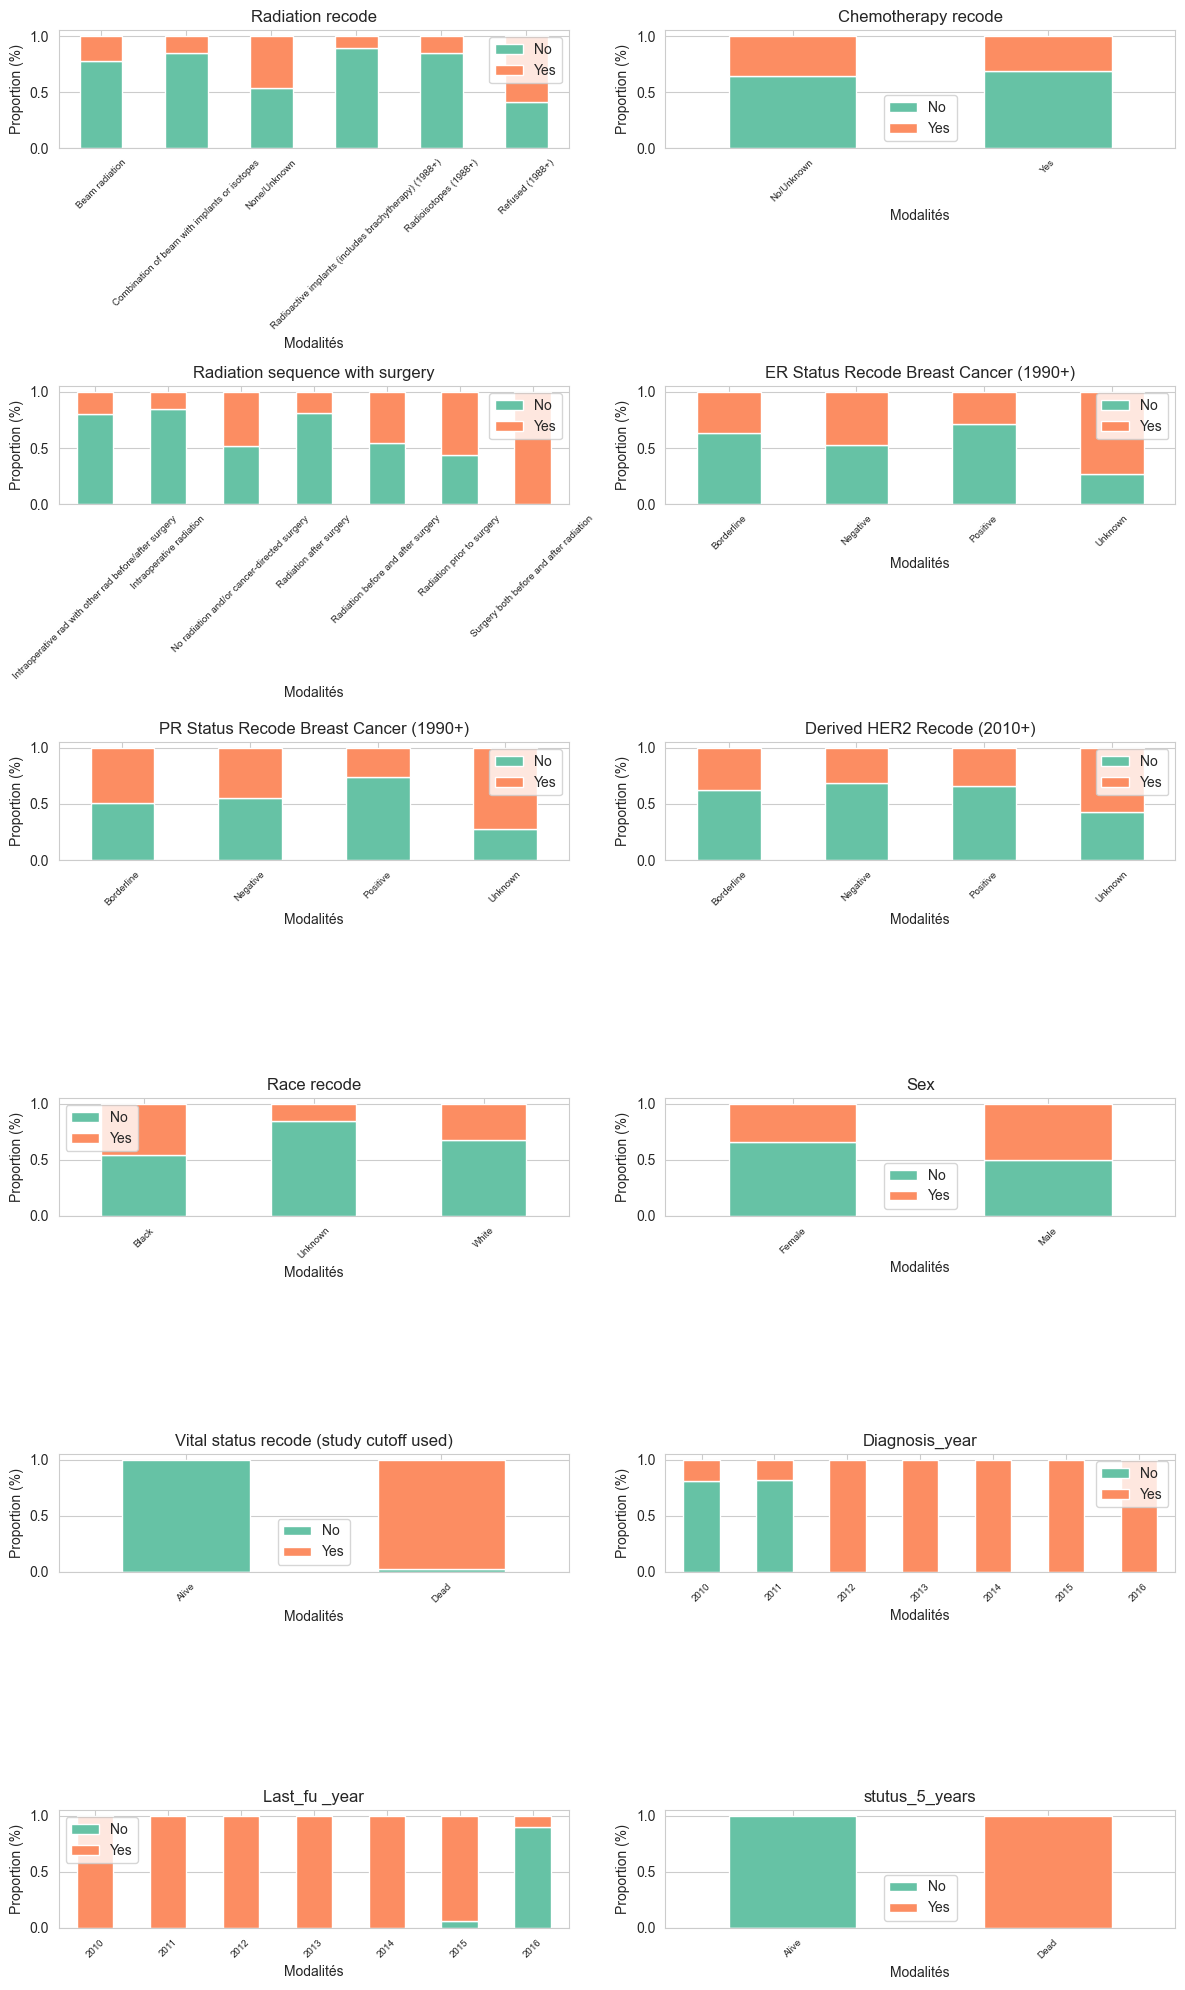

In [228]:
# variables categorielles pa rapport a y (variable cible)

# Définir un style global et une palette de couleurs avec seaborn
sns.set_style("whitegrid")  # Style général
palette = sns.color_palette("Set2")  # Palette de couleurs

# Créer une figure avec des sous-graphiques (2 lignes et 5 colonnes)
fig, axes = plt.subplots(6, 2, figsize=(12, 20))

# Boucle pour générer les bar plots sur les sous-graphiques
for i, var in enumerate(var_cat):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Générer un bar plot pour chaque variable catégorielle
    (datatest.groupby([var, 'y'])['y'].count()/datatest.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True, ax=ax, color=[palette[0], palette[1]])

    ax.set_title(var)
    ax.set_xlabel('Modalités')
    ax.set_ylabel('Proportion (%)')
    ax.legend(['No', 'Yes'])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.tick_params(axis='x', labelsize=7) 

# Supprimer les sous-graphiques vides s'il y en a
for j in range(len(var_cat), 10):
    fig.delaxes(axes.flatten()[j])
# plt.subplots_adjust(hspace=.5, wspace=0.3)

plt.tight_layout()
plt.show()